<a href="https://colab.research.google.com/github/GOPIKA-S-S/RL/blob/main/2348518RL_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement temporal-difference learning in a simulated environment.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gridworld environment
class GridWorld:
    def __init__(self, grid_size, start, goal, obstacles):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.reset()

    def reset(self):
        self.agent_position = self.start
        return self.agent_position

    def step(self, action):
        # Define action space: 0=up, 1=right, 2=down, 3=left
        deltas = [(-1, 0), (0, 1), (1, 0), (0, -1)]
        next_position = (
            self.agent_position[0] + deltas[action][0],
            self.agent_position[1] + deltas[action][1]
        )

        # Check for boundary and obstacles
        if (
            0 <= next_position[0] < self.grid_size[0] and
            0 <= next_position[1] < self.grid_size[1] and
            next_position not in self.obstacles
        ):
            self.agent_position = next_position

        # Check if goal is reached
        if self.agent_position == self.goal:
            return self.agent_position, 1, True  # Reward = 1
        else:
            return self.agent_position, -0.1, False  # Reward = -0.1 for each step

# Define Temporal-Difference Learning (TD(0))
def td_learning(env, episodes, alpha, gamma):
    # Initialize value function for each state
    V = np.zeros(env.grid_size)
    for episode in range(episodes):
        state = env.reset()
        done = False

        while not done:
            # Epsilon-greedy policy for exploration
            if np.random.rand() < 0.1:  # Exploration
                action = np.random.choice(4)
            else:  # Exploitation
                values = []
                for a in range(4):  # Check all possible actions
                    next_state, reward, _ = simulate_step(env, state, a)
                    values.append(reward + gamma * V[next_state])
                action = np.argmax(values)

            # Take a step
            next_state, reward, done = env.step(action)

            # TD(0) Update
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])

            state = next_state
    return V

# Helper function to simulate a step without modifying the environment
def simulate_step(env, state, action):
    deltas = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    next_position = (
        state[0] + deltas[action][0],
        state[1] + deltas[action][1]
    )
    if (
        0 <= next_position[0] < env.grid_size[0] and
        0 <= next_position[1] < env.grid_size[1] and
        next_position not in env.obstacles
    ):
        state = next_position

    reward = 1 if state == env.goal else -0.1
    done = state == env.goal
    return state, reward, done

# Simulate the environment
grid_size = (5, 5)
start = (0, 0)
goal = (4, 4)
obstacles = [(1, 1), (2, 2), (3, 3)]
env = GridWorld(grid_size, start, goal, obstacles)

# TD Learning parameters
episodes = 500
alpha = 0.1
gamma = 0.9

# Learn value function
value_function = td_learning(env, episodes, alpha, gamma)

# Display results
print("Learned Value Function:")
print(value_function)


Learned Value Function:
[[-0.11072416 -0.25316528 -0.18800998 -0.13861401 -0.0350714 ]
 [-0.00872812  0.         -0.04257434  0.15527912  0.41262551]
 [ 0.12216187  0.24532761  0.         -0.04516738  0.70019528]
 [ 0.16963677  0.39841017  0.50171456  0.          0.97604714]
 [ 0.21713164  0.56552318  0.74805328  0.92572124  0.        ]]


Environment:

A 5x5 grid.
Start at (0,0), goal at (4,4).
Obstacles are specified and are avoided by the agent.
Algorithm:

TD(0) updates the value function using the formula:
𝑉
(
𝑠
)
←
𝑉
(
𝑠
)
+
𝛼
(
𝑟
+
𝛾
𝑉
(
𝑠
′
)
−
𝑉
(
𝑠
)
)
V(s)←V(s)+α(r+γV(s
′
 )−V(s))
Uses an epsilon-greedy policy for action selection.
Parameters:

alpha: Learning rate.
gamma: Discount factor.
episodes: Number of training episodes.

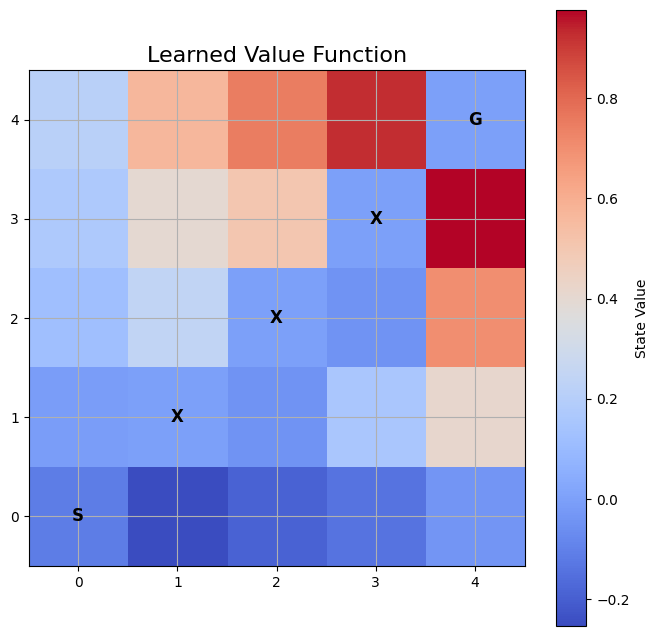

In [4]:
# Visualize the value function
def plot_value_function(value_function, grid_size, start, goal, obstacles):
    plt.figure(figsize=(8, 8))
    plt.imshow(value_function, cmap='coolwarm', origin='upper')
    plt.colorbar(label="State Value")
    plt.title("Learned Value Function", fontsize=16)

    # Add start and goal labels
    plt.text(start[1], start[0], "S", color="black", ha="center", va="center", fontsize=12, fontweight="bold")
    plt.text(goal[1], goal[0], "G", color="black", ha="center", va="center", fontsize=12, fontweight="bold")

    # Mark obstacles
    for obs in obstacles:
        plt.text(obs[1], obs[0], "X", color="black", ha="center", va="center", fontsize=12, fontweight="bold")

    plt.xticks(range(grid_size[1]))
    plt.yticks(range(grid_size[0]))
    plt.gca().invert_yaxis()
    plt.grid()
    plt.show()

# Plot the value function
plot_value_function(value_function, grid_size, start, goal, obstacles)
